# **Importing Library**

In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Crop_recommendation.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
df.size

17600

In [7]:

df.shape

(2200, 8)

In [9]:
print(df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [10]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [12]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# **Seperating features and target label**

In [13]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [14]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

# **Splitting into train and test data**

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# **Decision Tree**

In [16]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

# **Guassian Naive Bayes**

In [17]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

# **Support Vector Machine (SVM)**

In [18]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

# **Logistic Regression**

In [19]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

# **Random Forest**

In [20]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

# **Deployment**

			====================================MENU==========================================
						1.Crop Recommendation
						2.Model Accuracy
						3.Accuaracy Pie_chart
						4.Dataset
						5.Size of Dataset
						6.Shape of Dataset
						7.Exit


Enter ur choice:4

Dataset of 'Crop Recommendation:
-------------------------------------------------------------------
        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.92

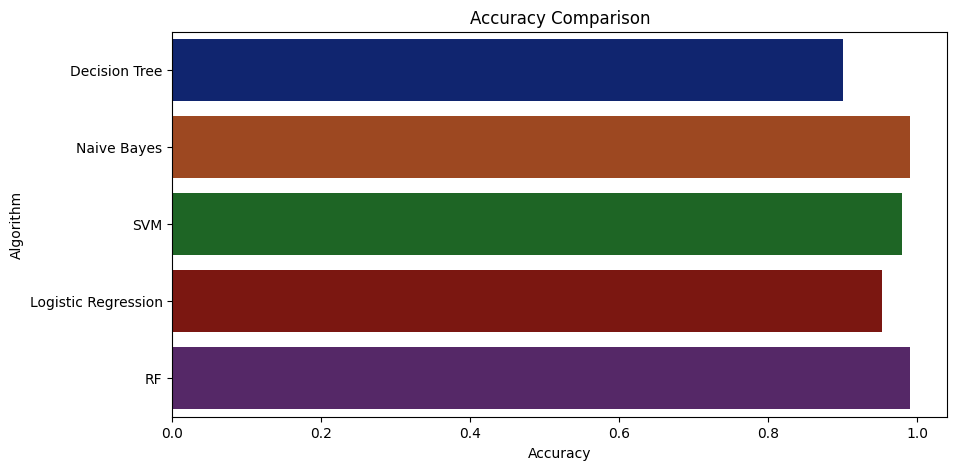

			====================================MENU==========================================
						1.Crop Recommendation
						2.Model Accuracy
						3.Accuaracy Pie_chart
						4.Dataset
						5.Size of Dataset
						6.Shape of Dataset
						7.Exit


Enter ur choice:3


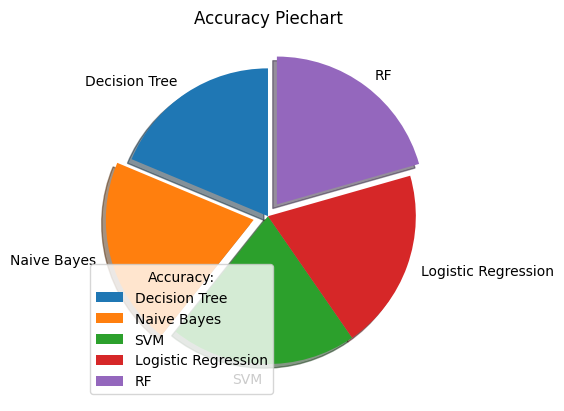

			====================================MENU==========================================
						1.Crop Recommendation
						2.Model Accuracy
						3.Accuaracy Pie_chart
						4.Dataset
						5.Size of Dataset
						6.Shape of Dataset
						7.Exit


Enter ur choice:7
Do you really want to exit 'Y/N':y
===========Thank You=============


In [26]:
i = 10000
while i > 0:
    print("\t\t\t====================================MENU==========================================")
    print("\t\t\t\t\t\t1.Crop Recommendation\n\t\t\t\t\t\t2.Model Accuracy\n\t\t\t\t\t\t3.Accuaracy Pie_chart\n\t\t\t\t\t\t4.Dataset\n\t\t\t\t\t\t5.Size of Dataset\n\t\t\t\t\t\t6.Shape of Dataset\n\t\t\t\t\t\t7.Exit")
    print("\t\t\t==================================================================================\n")

    ch = int(input("\nEnter ur choice:"))

    if(ch==1):
        print("\nEnter the data")
        print("Nitrogen(N):",end = '')
        N = int(input())
        print("Phosphorous(P):",end = '')
        P = int(input())
        print("Potassium(K):",end = '')
        K = int(input())
        print("Temperature(T):",end = '')
        T = int(input())
        print("Humidity(H):",end = '')
        H = int(input())
        print("pH:",end = '')
        pH = float(input())
        print("Rainfall(R):",end = '')
        R = int(input())
        print("\n")
        print("According to Your Data")
        #print("Nitrgen:{}\nPhosphorous:{}\nPotassium:{}\nTemperature:{}\nHumidity:{}\npH:{}\nRainfall:{}".format(N,P,K,T,H,pH,R))
        data = np.array([[N,P,K,T,H,pH,R]])
        prediction = RF.predict(data)
        print("'",prediction[0],"'",end = '')
        print("is recommonded best suitable crop")
        print("---------------------------------------------------------")
        #print("Do you want to continue 'y/n':")
        #y='y'
        #n='n'
        #a = input()
        #if(a==y):
        #    continue
        #elif(a==n):
        #    break

    elif(ch==2):
        accuracy_models = dict(zip(model, acc))
        for k, v in accuracy_models.items():
            print("---------------------------------------------")
            print (k,"Accuarcy is:", v)
            print("---------------------------------------------\n")

        print("To see the graph of accuracy of model")
        print("| Press 'g': | = ",end='')
        g = 'g'
        r = input()
        if(r==g):
            plt.figure(figsize=[10,5],dpi = 100)
            plt.title('Accuracy Comparison')
            plt.xlabel('Accuracy')
            plt.ylabel('Algorithm')
            sns.barplot(x = acc,y = model,palette='dark')
            plt.show()
        else:
            print("!!!!Error!!!!")

    elif(ch==3):
        import matplotlib.pyplot as plt
        import numpy as np
        myexplode = [0,0.1,0,0,0.1]
        y = acc
        mylabels = model
        plt.title("Accuracy Piechart")
        plt.pie(y,labels = mylabels,startangle = 90,shadow = True,explode = myexplode)
        plt.legend(title = "Accuracy:")
        plt.show()

    elif(ch==4):
        print("\nDataset of 'Crop Recommendation:")
        print("-------------------------------------------------------------------")
        print(df)
        print("-------------------------------------------------------------------")

    elif(ch==5):
        print("Size of dataset used is:",end='')
        print(df.size)
        print("------------------------------------")

    elif(ch==6):
        print("Dataset used contains respective rows & columns")
        print(df.shape)
        print("------------------------------------")

    elif(ch==7):
        print("Do you really want to exit 'Y/N':",end='')
        a = input()
        y = 'y'
        n = 'n'

        if(a==y):
            print("===========Thank You=============")
            break
        elif(a==n):
            continue

    else:
        print("================Oops Wrong choice is enter===============")